In [1]:
# 標準ライブラリ
from datetime import datetime, timedelta
from typing import Optional


# サードパーティライブラリ
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.figure import Figure

# プロジェクト内モジュール
from gamedata import hard_sales as hs
from gamedata import plot_hard as ph
from gamedata import hard_event as he
from gamedata import hard_info as hi


In [2]:
info_df = hi.load_hard_info()
event_df = he.load_hard_event()
delta_event_df = he.delta_event(event_df, info_df)

delta_event_df

,event_date,hw,hw2,event_name,priority,delta_week
report_date,,,,,,
2016-09-11,2016-09-07,PS4,,PS4Slim,1,133
2016-11-13,2016-11-10,PS4,,PS4Pro,1,142
2016-12-04,2016-11-29,PS4,,FF15,1,145
2017-07-23,2017-07-21,NSW,,スプラ2,2,20
2017-07-30,2017-07-29,PS4,,DQ11,2,179
2017-10-29,2017-10-27,NSW,,マリオデ,1,34
2018-01-28,2018-01-26,PS4,,MHW,1,205
2018-12-09,2018-12-06,PS4,,PS4大バンバン,1,250
2019-09-22,2019-09-20,NSW,,SwitchLite,1,133


In [3]:
hard_sales_df = hs.load_hard_sales()
pv_c_df = hs.pivot_cumulative_sales_by_delta(hard_sales_df)

pv_c_df

hw,3DS,DC,DS,GB,GBA,GC,N64,NS2,NSW,NeoGeoP,...,PSP,SATURN,Vita,WS,Wii,WiiU,XB360,XBOne,XSX,Xbox
delta_week,,,,,,,,,,,,,,,,,,,,,
0,371326.0,101490.0,441485.0,NaN,611504.0,133719.0,NaN,715432.0,330637.0,21471.0,...,166074.0,NaN,321407.0,102655.0,371936.0,308570.0,62135.0,23562.0,20534.0,123929.0
1,577413.0,133066.0,622716.0,NaN,935190.0,162928.0,NaN,868637.0,394057.0,26159.0,...,247429.0,NaN,402794.0,154012.0,481004.0,439223.0,74455.0,27136.0,24218.0,161076.0
2,681825.0,161061.0,843011.0,NaN,1132611.0,184265.0,NaN,1008663.0,444878.0,29324.0,...,349283.0,NaN,442900.0,177204.0,582960.0,561579.0,84490.0,28672.0,27811.0,172006.0
3,746767.0,203085.0,1056428.0,NaN,1272110.0,198567.0,NaN,1169684.0,524371.0,31041.0,...,451138.0,NaN,483007.0,209072.0,786039.0,635290.0,94525.0,30411.0,29433.0,179930.0
4,801423.0,270095.0,1269845.0,NaN,1367434.0,207105.0,NaN,1298327.0,556633.0,32963.0,...,506496.0,NaN,498744.0,233936.0,989118.0,709001.0,103180.0,31855.0,30844.0,184935.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,NaN,NaN,NaN,6388541.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
727,NaN,NaN,NaN,6388947.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
728,NaN,NaN,NaN,6389105.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
pv_s_df = hs.pivot_sales_by_delta(hard_sales_df)
pv_s_df

hw,3DS,DC,DS,GB,GBA,GC,N64,NS2,NSW,NeoGeoP,...,PSP,SATURN,Vita,WS,Wii,WiiU,XB360,XBOne,XSX,Xbox
delta_week,,,,,,,,,,,,,,,,,,,,,
0,371326.0,101490.0,441485.0,NaN,611504.0,133719.0,NaN,715432.0,330637.0,21471.0,...,166074.0,NaN,321407.0,102655.0,371936.0,308570.0,62135.0,23562.0,20534.0,123929.0
1,206087.0,31576.0,181231.0,NaN,323686.0,29209.0,NaN,153205.0,63420.0,4688.0,...,81355.0,NaN,81387.0,51357.0,109068.0,130653.0,12320.0,3574.0,3684.0,37147.0
2,104412.0,27995.0,220295.0,NaN,197421.0,21337.0,NaN,140026.0,50821.0,3165.0,...,101854.0,NaN,40106.0,23192.0,101956.0,122356.0,10035.0,1536.0,3593.0,10930.0
3,64942.0,42024.0,213417.0,NaN,139499.0,14302.0,NaN,161021.0,79493.0,1717.0,...,101855.0,NaN,40107.0,31868.0,203079.0,73711.0,10035.0,1739.0,1622.0,7924.0
4,54656.0,67010.0,213417.0,NaN,95324.0,8538.0,NaN,128643.0,32262.0,1922.0,...,55358.0,NaN,15737.0,24864.0,203079.0,73711.0,8655.0,1444.0,1411.0,5005.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,NaN,NaN,NaN,442.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
727,NaN,NaN,NaN,406.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
728,NaN,NaN,NaN,158.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
def add_event_positions_delta(event_df: pd.DataFrame, pivot_delta_df: pd.DataFrame, priority: int = 3) -> pd.DataFrame:
    """
    event_dfにx_pos（event_date）とy_pos（該当ハードの販売数）を追加し、条件に合わない行は除外した新しいDataFrameを返す。

    Args:
        event_df (pd.DataFrame): ゲームイベントデータ
        pivot_delta_df (pd.DataFrame): 累積週次販売データのピボット
        priority (int): この値以下のpriorityのイベントのみ残す

    Returns:
        pd.DataFrame: x_pos, y_posを追加したイベントデータ（条件に合わない行は除外）
    """
    # priorityでフィルタ（指定値以下のみ残す）
    filtered_events = event_df[event_df['priority'] <= priority].copy()
    x_pos_list = []
    y_pos_list = []
    drop_indices = []
    
    for idx, event_row in filtered_events.iterrows():
        delta_week = event_row['delta_week']
        hw = event_row['hw']
        hw2 = event_row['hw2']
        y_pos = None

        # delta_weekがpivot_delta_dfのindexに存在しない場合は除外
        if delta_week not in pivot_delta_df.index:
            drop_indices.append(idx)
            continue

        pivot_row = pivot_delta_df.loc[delta_week]

        # hwの値がNAでなく、pivot_rowに存在する場合
        if pd.notna(hw) and hw in pivot_row and not pd.isna(pivot_row[hw]):
            y_pos = pivot_row[hw]
        # hw2の値がNAでなく、pivot_rowに存在する場合
        elif pd.notna(hw2) and hw2 in pivot_row and not pd.isna(pivot_row[hw2]):
            y_pos = pivot_row[hw2]
        else:
            drop_indices.append(idx)
            continue

        x_pos_list.append(delta_week)
        y_pos_list.append(y_pos)

    # drop_indicesで行を除外
    filtered_events = filtered_events.drop(index=drop_indices)
    filtered_events = filtered_events.assign(x_pos=x_pos_list, y_pos=y_pos_list)
    return filtered_events



f2 = add_event_positions_delta(delta_event_df, pv_c_df, priority=3)

In [6]:
f2 = he.add_event_positions_delta(delta_event_df, pv_c_df, priority=3)
f2

,event_date,hw,hw2,event_name,priority,delta_week,x_pos,y_pos
report_date,,,,,,,,
2016-09-11,2016-09-07,PS4,,PS4Slim,1,133,133,3001234.0
2016-11-13,2016-11-10,PS4,,PS4Pro,1,142,142,3431163.0
2016-12-04,2016-11-29,PS4,,FF15,1,145,145,3625775.0
2017-07-23,2017-07-21,NSW,,スプラ2,2,20,20,1205087.0
2017-07-30,2017-07-29,PS4,,DQ11,2,179,179,4991752.0
2017-10-29,2017-10-27,NSW,,マリオデ,1,34,34,2041221.0
2018-01-28,2018-01-26,PS4,,MHW,1,205,205,6172173.0
2018-12-09,2018-12-06,PS4,,PS4大バンバン,1,250,250,7303856.0
2019-09-22,2019-09-20,NSW,,SwitchLite,1,133,133,9211699.0


In [7]:
he.filter_event(delta_event_df, hw=['NSW', 'PS4'])

,event_date,hw,hw2,event_name,priority,delta_week
report_date,,,,,,
2016-09-11,2016-09-07,PS4,,PS4Slim,1,133
2016-11-13,2016-11-10,PS4,,PS4Pro,1,142
2016-12-04,2016-11-29,PS4,,FF15,1,145
2017-07-23,2017-07-21,NSW,,スプラ2,2,20
2017-07-30,2017-07-29,PS4,,DQ11,2,179
2017-10-29,2017-10-27,NSW,,マリオデ,1,34
2018-01-28,2018-01-26,PS4,,MHW,1,205
2018-12-09,2018-12-06,PS4,,PS4大バンバン,1,250
2019-09-22,2019-09-20,NSW,,SwitchLite,1,133


In [8]:
import sqlite3

DB_PATH = '/Users/hide/Documents/sqlite3/gamehard.db'

def load_hard_info() -> pd.DataFrame:
    """ハード情報の読み込み

    Returns:
        pd.DataFrame: ハード情報
    """
    # SQLite3データベースに接続
    conn = sqlite3.connect(DB_PATH)
    # SQLクエリを実行してデータをDataFrameに読み込む
    query = "SELECT * FROM gamehard_info;"
    df = pd.read_sql_query(query, conn)
    df['launch_date'] = pd.to_datetime(df['launch_date'])
    
    # 接続を閉じる
    conn.close()

    return df


In [9]:
df_hard_info = load_hard_info()


In [10]:
df_hard_event = he.load_hard_event()
df_hard_event = df_hard_event.reset_index()
df_event_merged = df_hard_event.merge(how='left', right=df_hard_info, left_on='hw', right_on="id")

In [11]:
df_event_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 36
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   report_date  37 non-null     datetime64[ns]
 1   event_date   37 non-null     datetime64[ns]
 2   hw           37 non-null     object        
 3   hw2          37 non-null     object        
 4   event_name   37 non-null     object        
 5   priority     37 non-null     int64         
 6   id           37 non-null     object        
 7   launch_date  37 non-null     datetime64[ns]
 8   maker_name   37 non-null     object        
 9   full_name    37 non-null     object        
dtypes: datetime64[ns](3), int64(1), object(6)
memory usage: 3.2+ KB


In [12]:
# launch_dateとreport_dateの差を計算して新カラム　delta_weekを設定
df_event_merged['delta_week'] = (df_event_merged['report_date'] - df_event_merged['launch_date']).dt.days // 7

In [13]:
df_event_merged

,report_date,event_date,hw,hw2,event_name,priority,id,launch_date,maker_name,full_name,delta_week
0,2016-09-11,2016-09-07,PS4,,PS4Slim,1,PS4,2014-02-22,SONY,PlayStation4,133
1,2016-11-13,2016-11-10,PS4,,PS4Pro,1,PS4,2014-02-22,SONY,PlayStation4,142
2,2016-12-04,2016-11-29,PS4,,FF15,1,PS4,2014-02-22,SONY,PlayStation4,145
3,2017-07-23,2017-07-21,NSW,,スプラ2,2,NSW,2017-03-03,Nintendo,Nintendo Switch,20
4,2017-07-30,2017-07-29,PS4,,DQ11,2,PS4,2014-02-22,SONY,PlayStation4,179
5,2017-10-29,2017-10-27,NSW,,マリオデ,1,NSW,2017-03-03,Nintendo,Nintendo Switch,34
6,2018-01-28,2018-01-26,PS4,,MHW,1,PS4,2014-02-22,SONY,PlayStation4,205
7,2018-12-09,2018-12-06,PS4,,PS4大バンバン,1,PS4,2014-02-22,SONY,PlayStation4,250
8,2019-09-22,2019-09-20,NSW,,SwitchLite,1,NSW,2017-03-03,Nintendo,Nintendo Switch,133
9,2019-12-22,2019-12-19,PS4,,PS4数量限定セール,2,PS4,2014-02-22,SONY,PlayStation4,304


In [14]:
df_event_merged.set_index('report_date', inplace=True )

In [15]:
df_event_merged

,event_date,hw,hw2,event_name,priority,id,launch_date,maker_name,full_name,delta_week
report_date,,,,,,,,,,
2016-09-11,2016-09-07,PS4,,PS4Slim,1,PS4,2014-02-22,SONY,PlayStation4,133
2016-11-13,2016-11-10,PS4,,PS4Pro,1,PS4,2014-02-22,SONY,PlayStation4,142
2016-12-04,2016-11-29,PS4,,FF15,1,PS4,2014-02-22,SONY,PlayStation4,145
2017-07-23,2017-07-21,NSW,,スプラ2,2,NSW,2017-03-03,Nintendo,Nintendo Switch,20
2017-07-30,2017-07-29,PS4,,DQ11,2,PS4,2014-02-22,SONY,PlayStation4,179
2017-10-29,2017-10-27,NSW,,マリオデ,1,NSW,2017-03-03,Nintendo,Nintendo Switch,34
2018-01-28,2018-01-26,PS4,,MHW,1,PS4,2014-02-22,SONY,PlayStation4,205
2018-12-09,2018-12-06,PS4,,PS4大バンバン,1,PS4,2014-02-22,SONY,PlayStation4,250
2019-09-22,2019-09-20,NSW,,SwitchLite,1,NSW,2017-03-03,Nintendo,Nintendo Switch,133


In [16]:
df_hard_info

,id,launch_date,maker_name,full_name
0,PS5,2020-11-12,SONY,PlayStation5
1,XSX,2020-11-10,Microsoft,Xbox Series X|S
2,NSW,2017-03-03,Nintendo,Nintendo Switch
3,NS2,2025-06-05,Nintendo,Nintendo Switch2
4,XBOne,2014-09-04,Microsoft,XboxOne
5,PS4,2014-02-22,SONY,PlayStation4
6,WiiU,2012-12-08,Nintendo,WiiU
7,Vita,2011-12-17,SONY,PlayStation Vita
8,3DS,2011-02-26,Nintendo,Nintendo 3DS
9,Wii,2006-12-02,Nintendo,Wii


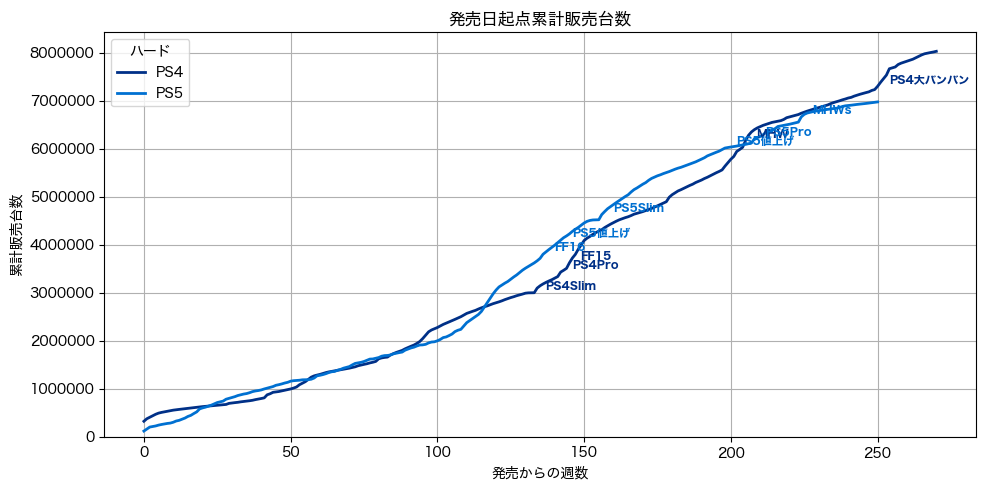

In [18]:
(fig, df) = ph.plot_cumulative_sales_by_delta(hw=['PS4', 'PS5'], end=270, event_priority=1, event_flag=True)

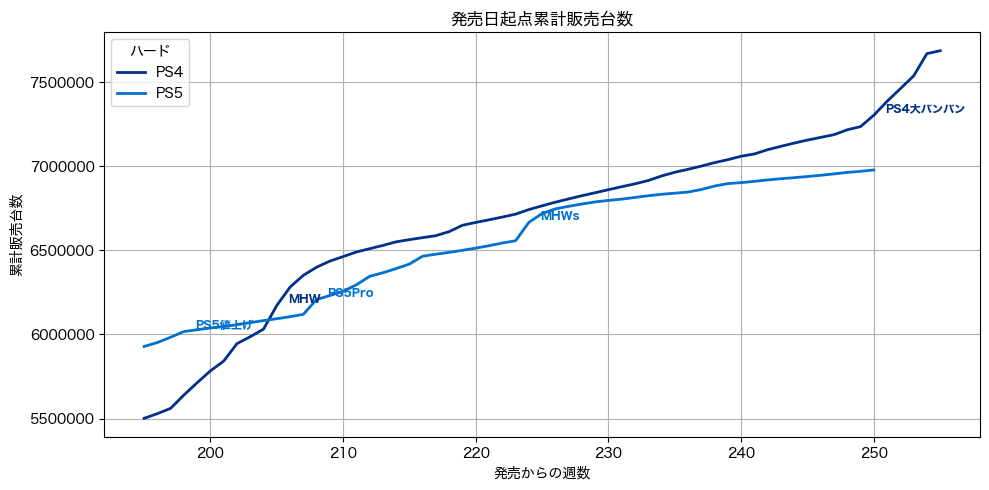

In [20]:
(fig, df) = ph.plot_cumulative_sales_by_delta(hw=['PS4', 'PS5'], begin=195, end=255,
                                              event_priority=1, event_flag=True)

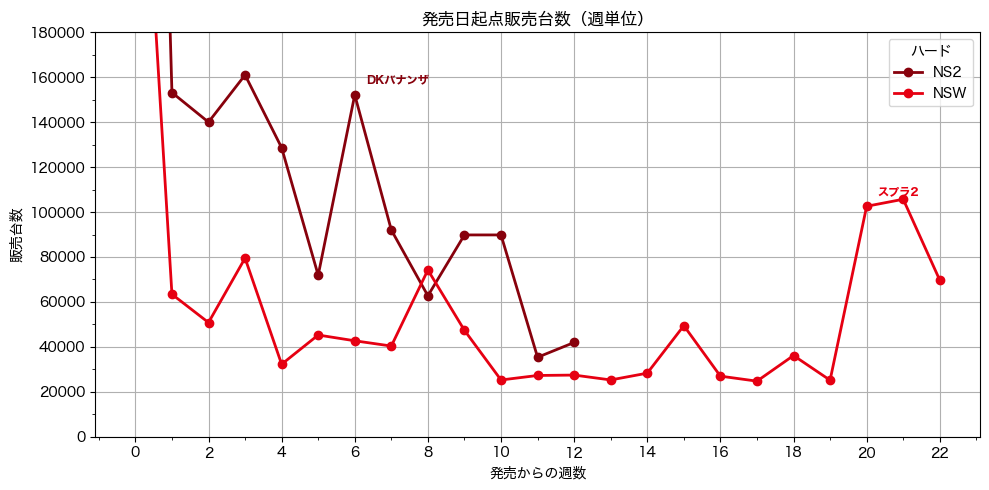

In [21]:
(fig, df) = ph.plot_sales_by_delta(hw=["NSW", "NS2"], end=22, ymax=180000, xgrid=2, ygrid=20000, mode="week", event_flag=True)